# Data Exploration

## Setup

In [130]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [131]:
connection = sqlite3.connect("../data/bt_and_weather.sqlite")
dwd = pd.read_sql_query("SELECT * from dwd", connection)
bt = pd.read_sql_query("SELECT * from bicycle_theft", connection)
dwd["date_hour"] = pd.to_datetime(dwd["date_hour"])
dwd.set_index("date_hour",inplace=True)

bt["theft_begin_time"] = pd.to_datetime(bt["theft_begin_time"])
bt["theft_end_time"] = pd.to_datetime(bt["theft_end_time"])
bt["created_time"] = pd.to_datetime(bt["created_time"])

connection.close()

## DWD data

### Averages, Maximums, Minimums and NA-report

In [132]:
start_time = dwd.index.min()
end_time = dwd.index.max()

print("Air temp stats in degrees Celcius")
print(dwd["air_temperature"].describe())
print(dwd["air_temperature"].info())


print("\n\n\nPrecipitation in mm per hour")
print(dwd["precipitation"].describe())
print(dwd["precipitation"].info())


print("\n\n\nHumidity in degrees")
print(dwd["humidity"].describe())
print(dwd["humidity"].info())

Air temp stats in degrees Celcius
count    238388.000000
mean          9.959861
std           8.419088
min         -21.700000
25%           3.600000
50%           9.800000
75%          16.100000
max          37.900000
Name: air_temperature, dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 238388 entries, 1995-09-01 00:00:00 to 2022-12-31 23:00:00
Series name: air_temperature
Non-Null Count   Dtype  
--------------   -----  
238388 non-null  float64
dtypes: float64(1)
memory usage: 3.6 MB
None



Precipitation in mm per hour
count    238388.000000
mean          0.058040
std           0.417661
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          51.800000
Name: precipitation, dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 238388 entries, 1995-09-01 00:00:00 to 2022-12-31 23:00:00
Series name: precipitation
Non-Null Count   Dtype  
--------------   -----  
238388 non-null  float64
dtypes: float64(1)
me

### Sum of percipitation for each month

Text(0.5, 0, 'Month')

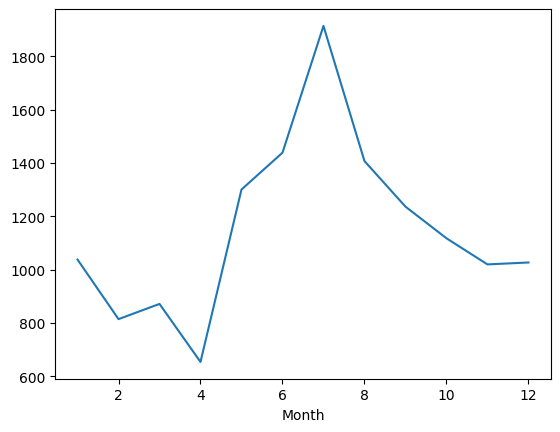

In [133]:
dwd["precipitation"].groupby(by=[dwd.index.month]).sum().sort_index().plot().set_xlabel("Month")


### Average air temp for each month

Text(0.5, 0, 'Month')

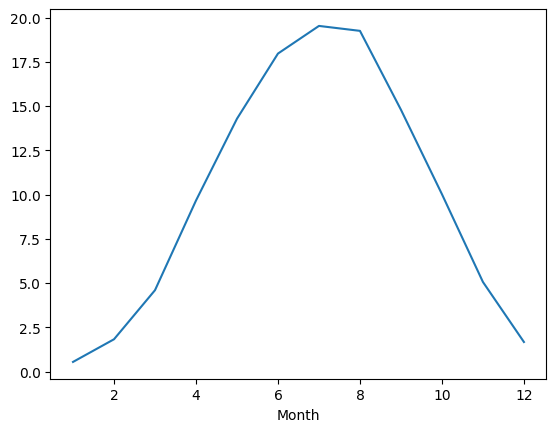

In [134]:
dwd["air_temperature"].groupby(by=[dwd.index.month]).mean().sort_index().plot().set_xlabel("Month")

### Mean airtemperature over time

Text(0.5, 0, 'Time')

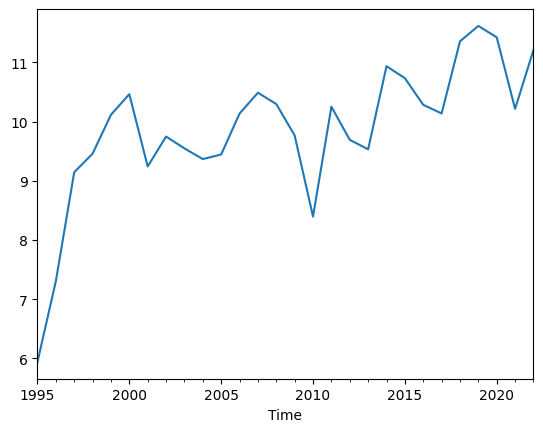

In [135]:
dwd["air_temperature"].groupby(pd.Grouper(freq='Y')).mean().plot().set_xlabel("Time")

### Mean precipitation over time

Text(0.5, 0, 'Time')

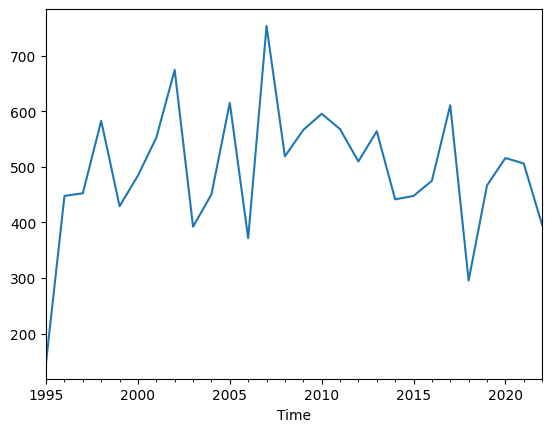

In [136]:
dwd["precipitation"].groupby(pd.Grouper(freq='Y')).sum().plot().set_xlabel("Time")

### Precipitation type distribution

<Axes: >

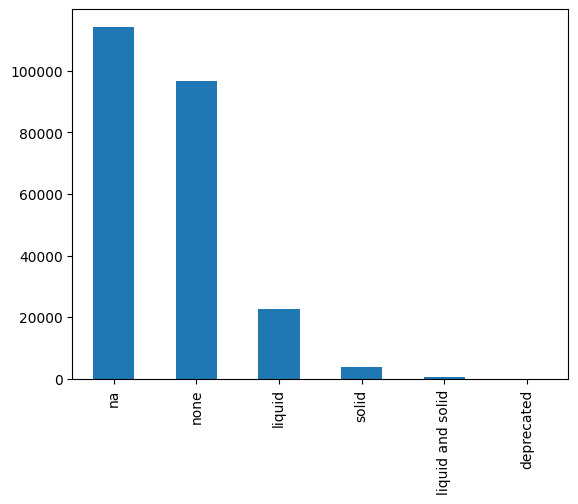

In [137]:
dwd["precipitation_type"].value_counts().plot.bar()

## Bicycle theft data

### NA - Report

In [138]:
print(bt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42734 entries, 0 to 42733
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                42734 non-null  int64         
 1   region_identifier    42734 non-null  int64         
 2   damages_amount_euro  42734 non-null  int64         
 3   type_of_bike         42734 non-null  object        
 4   type_of_crime        42734 non-null  object        
 5   type_of_theft        42734 non-null  object        
 6   theft_begin_time     42734 non-null  datetime64[ns]
 7   theft_end_time       42734 non-null  datetime64[ns]
 8   created_time         42734 non-null  datetime64[ns]
 9   only_attempted       42734 non-null  object        
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 3.3+ MB
None


### Stats for numeric columns

In [139]:
print(bt["damages_amount_euro"].describe())
print("\n\n")
print("Timeframe of the dataset: {} to {}".format(bt["created_time"].min(),bt["created_time"].max()))

count    42734.000000
mean      1087.677049
std       1073.925439
min          0.000000
25%        450.000000
50%        750.000000
75%       1299.000000
max      10000.000000
Name: damages_amount_euro, dtype: float64



Timeframe of the dataset: 2022-01-01 00:00:00 to 2023-11-18 00:00:00


### Theft, bike and crime type distributions

<Axes: >

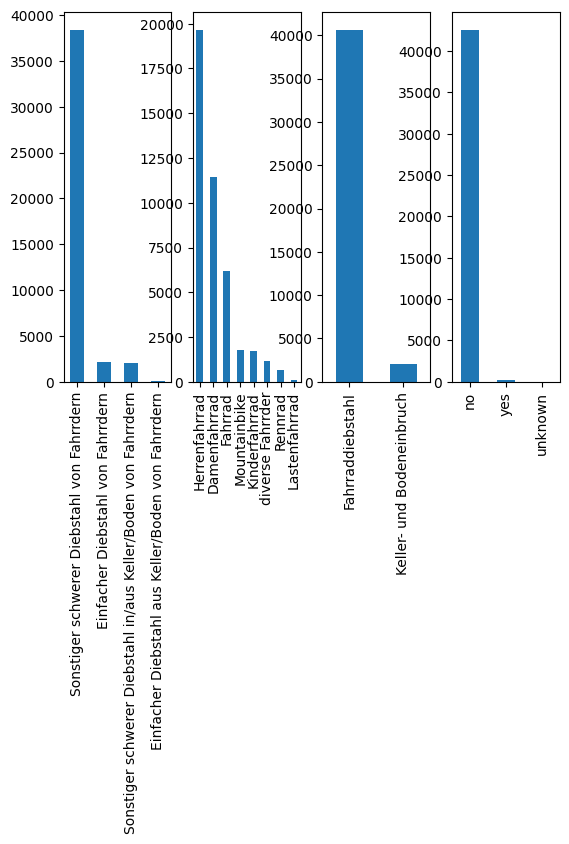

In [140]:
fig, axes = plt.subplots(1,4)
bt["type_of_theft"].value_counts().plot(kind="bar",ax=axes[0])
bt["type_of_bike"].value_counts().plot(kind="bar",ax=axes[1])
bt["type_of_crime"].value_counts().plot(kind="bar",ax=axes[2])
bt["only_attempted"].value_counts().plot(kind="bar",ax=axes[3])


### Damage value distribution

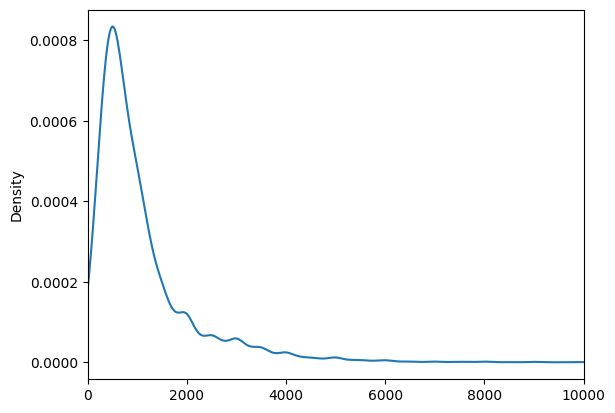

In [141]:
bt["damages_amount_euro"].plot.density().set_xbound(bt["damages_amount_euro"].min(), bt["damages_amount_euro"].max())

### Top 5 regions with most thefts

In [142]:
bt["region_identifier"].value_counts().sort_values(ascending=False).head()

9100101    467
2300419    433
1300836    315
1100310    310
2200210    295
Name: region_identifier, dtype: int64

### Distributions of thefts per hour (begin time and end time)

<Axes: xlabel='theft_end_time'>

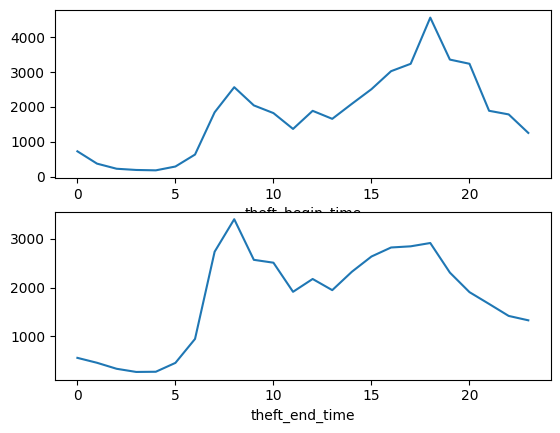

In [168]:
fig, axes = plt.subplots(2,1)
thefts = bt.copy()

thefts.set_index("theft_begin_time",inplace=True)
thefts.groupby(thefts.index.hour).count().sort_index()["index"].plot(kind="line",ax=axes[0])

thefts.set_index("theft_end_time",inplace=True)
thefts.groupby(thefts.index.hour).count().sort_index()["index"].plot(kind="line",ax=axes[1])